# Feedback Analysis - Relevance Task

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [2]:
db.collection_names()
hits = db.hits
ts = db.tasksets

## Feedback Scores

Q: _How satisfied were people with the tasks?_

In [42]:
search = ts.aggregate([
        {'$match':{'meta.test':False, 'meta.type':'relevance judgments'}},
        {'$project':{
                'form':'$feedback.form',
                'taskSatisfaction':'$feedback.satisfaction',
                'paySatisfaction': '$feedback.pay',
                'time':'$time.workTime',
                'design': '$meta.design', 
                'condition': '$meta.condition',
                'countUserHIT': '$meta.countUserHIT',
                'percentile': '$meta.percentile'
                }}
        ])

feedback = pd.DataFrame(list(search)).convert_objects(convert_numeric=True)
feedback

,_id,condition,countUserHIT,design,form,paySatisfaction,percentile,taskSatisfaction,time
0,35BLDD71I6XXX1TB5KU49V2713VVZJ,basic,NaN,basic,None,NaN,NaN,NaN,3669
1,31EUONYN2V3LYXF43BJNTXV3H6COV8,feedback,35,basic,None,NaN,0.642202,NaN,7168
2,3Y54SXRO1LL1YAVCU2VHRLZ727KUTB,feedback,33,basic,None,NaN,0.645455,NaN,9728
3,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,NaN,basic,None,NaN,NaN,NaN,141162
4,3ZDAD0O1T1DTFEP7Z764BSYBWIFTX2,basic,NaN,basic,None,NaN,NaN,NaN,37916
5,3VNXK88KKCIIRABY1M05W70EM059VG,basic,NaN,basic,None,NaN,NaN,NaN,48901
6,3OB0CAO74HPSAAOM49BHGN2WNUFHYN,basic,NaN,basic,None,NaN,NaN,NaN,47093
7,38BQUHLA9W028ALVPJIW61CQQ6EOMR,basic,NaN,basic,None,NaN,NaN,NaN,72984
8,37XITHEISW9SW11K4M5MX0CJ7FURCL,basic,NaN,basic,None,NaN,NaN,NaN,61805
9,3XXU1SWE8MVG3SKNQVQG79L8YMAA04,basic,NaN,basic,None,NaN,NaN,NaN,56917


In [144]:
groups = feedback[['paySatisfaction', 'taskSatisfaction', 'condition']].groupby('condition')
groups.agg([np.mean, 
            np.median, 
            np.var, 
            # N
            len, 
            (lambda x: np.count_nonzero(~np.isnan(x)))
           ])

paySatisfaction                                taskSatisfaction  \
                     mean median       var  len <lambda>             mean   
condition                                                                   
basic                 NaN    NaN       NaN  146        0              NaN   
fast             4.375000      5  0.790966  150      120         4.393443   
feedback         4.520000      5  0.377143  418       50         4.680000   
training         4.050314      4  1.010111  264      159         4.593750   

                                          
          median       var  len <lambda>  
condition                                 
basic        NaN       NaN  146        0  
fast           5  0.753014  150      122  
feedback       5  0.303673  418       50  
training       5  0.557193  264      160

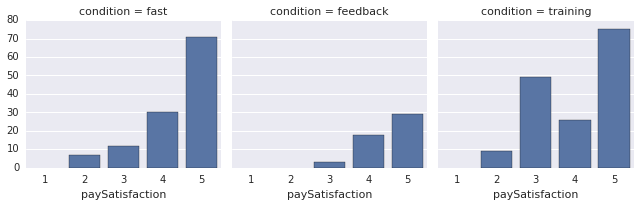

In [88]:
g = sns.FacetGrid(feedback[feedback['paySatisfaction']>0], col='condition', margin_titles=True)
bins = np.linspace(1, 6, 5)
g.map(sns.countplot, "paySatisfaction", order=[1,2,3,4,5]).savefig("../images/paySatisfaction-relevance.png")

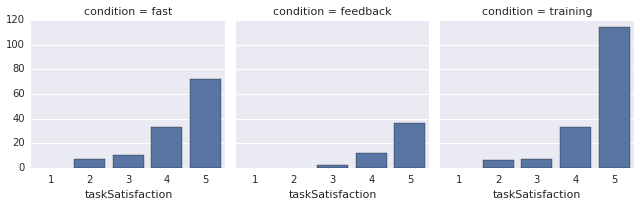

In [87]:
g = sns.FacetGrid(feedback[feedback['taskSatisfaction']>0], col='condition', margin_titles=True)
bins = np.linspace(1, 6, 5)
g.map(sns.countplot, "taskSatisfaction", order=[1,2,3,4,5]).savefig("../images/taskSatisfaction-relevance.png")

Q: _For the performance feedback condition, was satisfaction related to performance?_

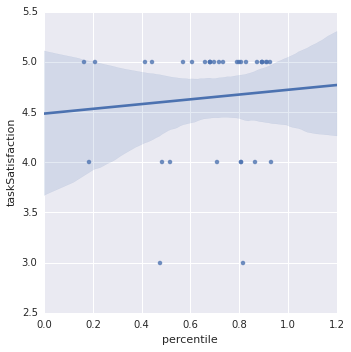

In [103]:
byRank = feedback.query("condition=='feedback' & percentile >0")[['percentile', 'paySatisfaction', 'taskSatisfaction']]
sns.lmplot(y="taskSatisfaction", x="percentile", data = byRank)

That's useless, let's just count stats.

In [128]:
byRank['percentileBin'] = byRank['percentile'].apply(lambda x: 1+np.floor_divide(x,0.25))
byRank[['percentileBin', 'paySatisfaction', 'taskSatisfaction']] \
  .groupby('percentileBin') \
  .agg([np.mean, np.median, np.std, len, (lambda x: np.count_nonzero(~np.isnan(x)))])

paySatisfaction                              taskSatisfaction  \
                         mean median      std len <lambda>             mean   
percentileBin                                                                 
1                    5.000000      5  0.00000   3        3         4.666667   
2                    4.500000      5  1.00000  17        4         4.250000   
3                    4.727273      5  0.64667  35       11         4.818182   
4                    4.375000      4  0.50000  19       16         4.625000   

                                             
              median       std len <lambda>  
percentileBin                                
1                5.0  0.577350   3        3  
2                4.5  0.957427  17        4  
3                5.0  0.404520  35       11  
4                5.0  0.619139  19       16